# Initial Conditions Optimization
## Plot History

In [62]:
%matplotlib inline
import matplotlib
matplotlib.font_manager._rebuild()
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import matplotlib.style as style
style.use('fivethirtyeight')
import ray
import io
import os
from IPython.display import display, HTML, Markdown

## Load PlayFair Display and Roboto Fonts from Google

In [63]:
from tempfile import NamedTemporaryFile
import urllib.request
import matplotlib.font_manager as fm

github_url = 'https://github.com/google/fonts/blob/master/ofl/playfairdisplay/static/PlayfairDisplay-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
heading_font = fm.FontProperties(fname=f.name, size=28)

github_url = 'https://github.com/google/fonts/blob/master/ofl/roboto/static/Roboto-Regular.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
subtitle_font = fm.FontProperties(fname=f.name, size=20)


## Load Humor Sans Font

In [64]:
# github_url = 'http://antiyawn.com/uploads/Humor-Sans-1.0.ttf'
# github_url = 'https://github.com/ipython/xkcd-font/blob/master/xkcd-script/font/xkcd-script.ttf'
github_url = 'https://github.com/ipython/xkcd-font/blob/master/xkcd/build/xkcd-Regular.otf'
# github_url = 'https://github.com/shreyankg/xkcd-desktop/blob/master/Humor-Sans.ttf'
url = github_url + '?raw=true'  # You want the actual file, not some html

request = urllib.request.Request(url)
response = urllib.request.urlopen(request)
f = NamedTemporaryFile(delete=False, suffix='.ttf')
f.write(response.read())
f.close()
comic_font = fm.FontProperties(fname=f.name, size=18)

# Main code

In [65]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;}

<IPython.core.display.Javascript object>

## Load Initial Parameters

In [66]:
dfparam = pd.read_csv("data/param.csv")
display(dfparam)


DRS  start-date  prediction-range         s0  \
0        DRS 01 - Grande São Paulo  2020-03-20               200 2.0000e+06   
1               DRS 02 - Araçatuba  2020-04-01               200 5.0000e+02   
2              DRS 03 - Araraquara  2020-04-01               200 2.0000e+03   
3        DRS 04 - Baixada Santista  2020-04-01               200 8.0000e+03   
4                DRS 05 - Barretos  2020-04-01               200 2.0000e+03   
5                   DRS 06 - Bauru  2020-04-01               200 1.0000e+04   
6                DRS 07 - Campinas  2020-04-01               200 2.0000e+04   
7                  DRS 08 - Franca  2020-04-01               200 1.0000e+03   
8                 DRS 09 - Marília  2020-04-01               200 5.0000e+03   
9              DRS 10 - Piracicaba  2020-04-01               200 1.0000e+04   
10    DRS 11 - Presidente Prudente  2020-04-01               200 1.0000e+03   
11               DRS 12 - Registro  2020-04-01               200 1.0000e+03   
12         DRS 13 - Ribeirão Preto  2020-04-01               200 5.0000e+03   
13  DRS 14 - São João da Boa Vista  2020-04-01               200 2.0000e+03   
14  DRS 15 - São José do Rio Preto  2020-04-01               200 1.0000e+04   
15               DRS 16 - Sorocaba  2020-04-01               200 1.2000e+03   
16                DRS 17 - Taubaté  2020-04-01               200 1.0000e+04   

           e0         a0         i0         r0         d0  START      RATIO  \
0  1.0000e-04 1.0000e-04 8.0000e+02 3.0000e+02 4.0000e+02      0 1.5000e-01   
1  1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
2  1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
3  1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
4  1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
5  1.0000e-04 1.0000e-04 4.0000e+00 1.0000e-04 1.0000e-04      0 1.5000e-01   
6  1.0000e-04 1.0000e-04 4.0000e+01 1.0000e-04 1.0000e-04      0 1.5000e-01   
7  1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
8  1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
9  1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e+00      0 1.5000e-01   
10 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
11 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
12 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      5 1.5000e-01   
13 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
14 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04 1.0000e-04      0 1.5000e-01   
15 1.0000e-04 1.0000e-04 2.0000e+00 1.0000e-04 1.0000e-04      0 1.5000e-01   
16 1.0000e-04 1.0000e-04 1.7000e+01 1.0000e-04 2.0000e+00      0 1.5000e-01   

       WCASES       WREC  
0  1.5000e-01 5.0000e-02  
1  4.0000e-01 1.0000e-01  
2  4.0000e-01 1.0000e-01  
3  4.0000e-01 1.0000e-01  
4  4.0000e-01 1.0000e-01  
5  4.0000e-01 1.0000e-01  
6  4.0000e-01 1.0000e-01  
7  4.0000e-01 1.0000e-01  
8  4.0000e-01 1.0000e-01  
9  4.0000e-01 1.0000e-01  
10 4.0000e-01 1.0000e-01  
11 4.0000e-01 1.0000e-01  
12 4.0000e-01 1.0000e-01  
13 4.0000e-01 1.0000e-01  
14 4.0000e-01 1.0000e-01  
15 4.0000e-01 1.0000e-01  
16 4.0000e-01 1.0000e-01

## Select data set

In [67]:
opt=3

#select history file version, model and states
if opt==0:
    #original s0,i0,d0 based on param.csv file
    version=105
    model="Yabox"
    DRS=dfparam.DRS

if opt==1:
    #introduced s0 based on population
    #SP went too high on s0 and wcases
    version=106
    model="Yabox"
    DRS=dfparam.DRS

if opt==2:
    #improved range for s0,i0,d0 and weights
    #increased delta startdate +-3
    version=107
    model="Yabox"
    DRS=dfparam.DRS

if opt==3:
    #improved range for s0,i0,d0 and weights
    #increased delta startdate +-3
    version=109 #skipped 108
    model="Yabox"
    DRS=dfparam.DRS

In [68]:
strFile="results/IC_optimizeddistrictRegions"+str(version)+".csv"
if os.path.isfile(strFile):
    os.remove(strFile)

## Plot and Save Results

# Results for DRS 01 - Grande São Paulo District Region

gtot  startdate  startNcases       s0   i0  d0     wcases       wrec
29 6.3201e+08 2020-03-18           34  6081873  116  53 4.2140e-01 1.2300e-02

## 5 Lowest Results

gtot  startdate  startNcases       s0   i0  d0     wcases       wrec
29 6.3201e+08 2020-03-18           34  6081873  116  53 4.2140e-01 1.2300e-02
22 2.8252e+09 2020-03-19          130  1096749  199  15 4.4420e-01 1.2000e-02
5  6.0018e+09 2020-03-20            7  5507695  102  53 4.6940e-01 1.4600e-02
45 1.0370e+11 2020-03-18           67  4359250  193   0 5.7530e-01 4.1000e-03
10 5.4645e+11 2020-03-18           67  1195011  106   0 5.8700e-01 1.8200e-02

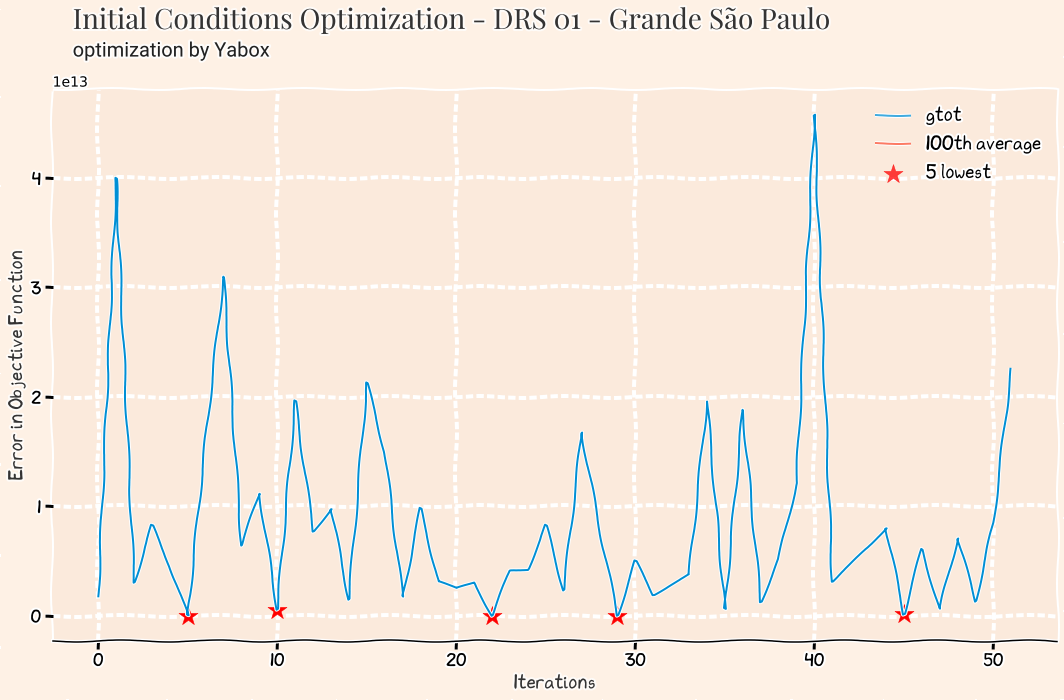

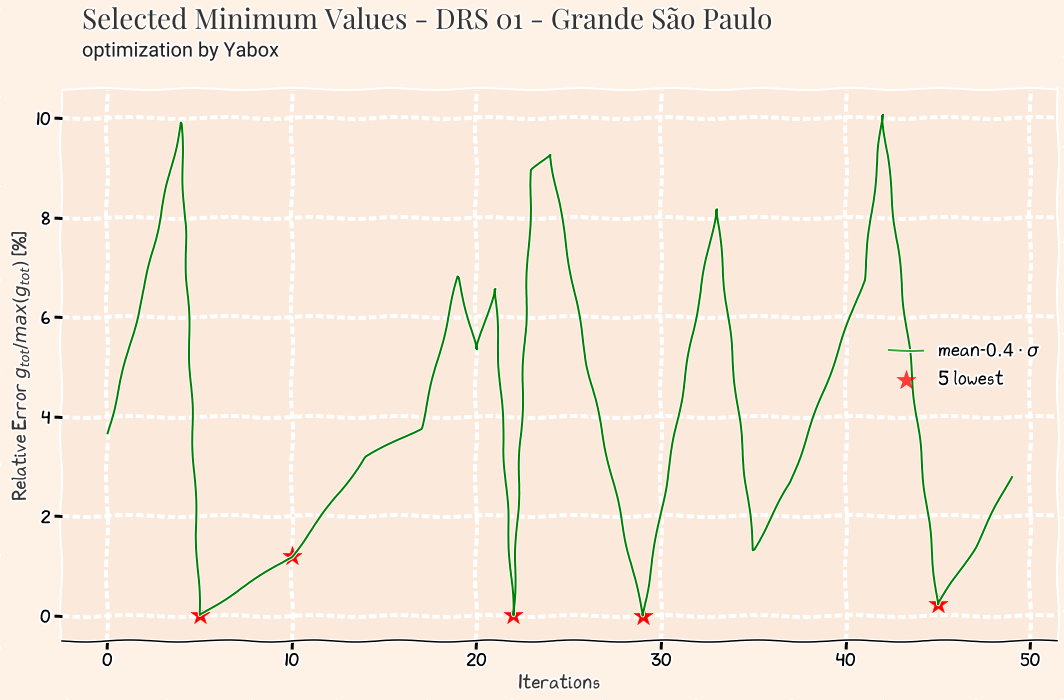

# Results for DRS 02 - Araçatuba District Region

gtot  startdate  startNcases      s0  i0  d0     wcases       wrec
25 1.8789e+05 2020-03-30          142  199034  80  63 4.9960e-01 2.7000e-03

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
25 1.8789e+05 2020-03-30          142  199034   80  63 4.9960e-01 2.7000e-03
42 2.1597e+05 2020-04-01           86  128139  160  33 4.9560e-01 3.3100e-02
44 3.5989e+05 2020-03-31           38  133055   92  67 5.4580e-01 1.6300e-02
32 3.9278e+05 2020-03-31           96  168847  153  99 4.3670e-01 3.4600e-02
50 2.0971e+06 2020-03-30           95  226159  146  40 4.3340e-01 1.5000e-02

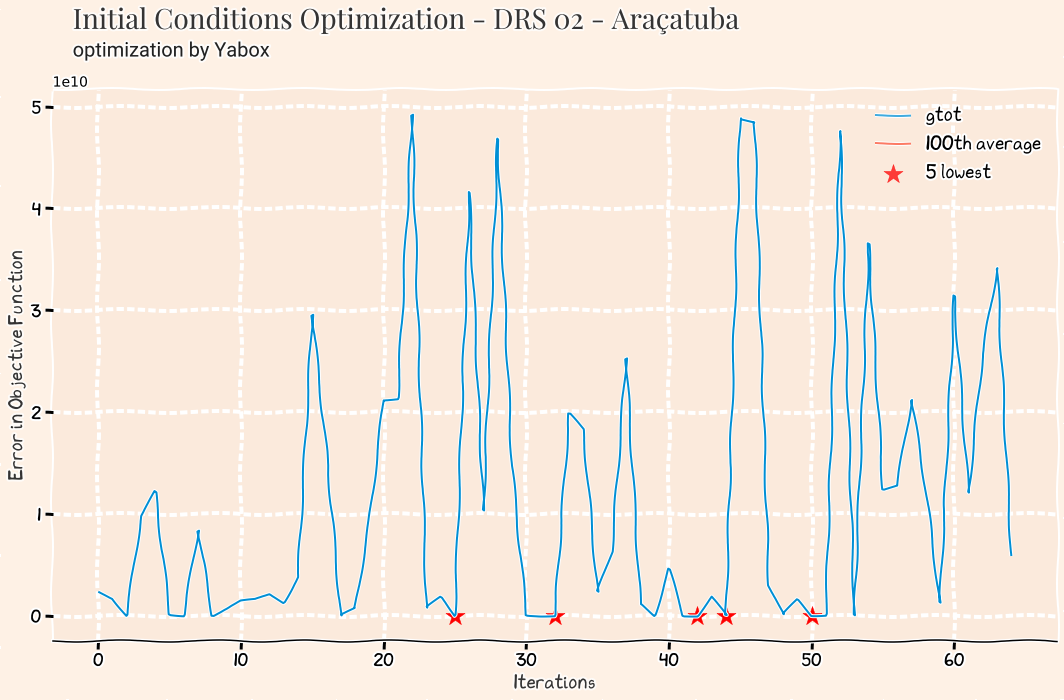

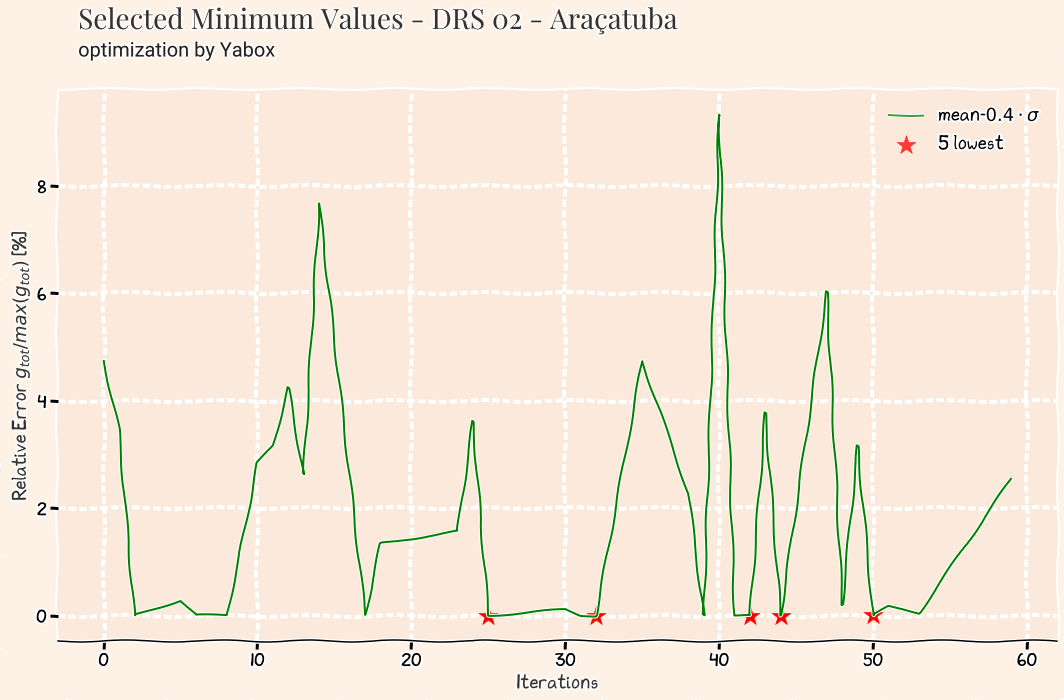

# Results for DRS 03 - Araraquara District Region

gtot  startdate  startNcases      s0  i0  d0     wcases       wrec
8 1.7714e+05 2020-04-01           52  285039  35  30 4.9440e-01 5.1000e-03

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
8  1.7714e+05 2020-04-01           52  285039   35  30 4.9440e-01 5.1000e-03
62 1.7199e+06 2020-03-30           47  261973  107  56 4.4540e-01 3.0100e-02
6  1.8600e+06 2020-04-01          107   55761  207  80 5.8890e-01 3.9300e-02
50 1.9906e+06 2020-03-31          124  286767  149  92 4.0390e-01 2.1900e-02
48 2.0386e+06 2020-03-31          138  204458  132  83 5.4610e-01 1.3000e-03

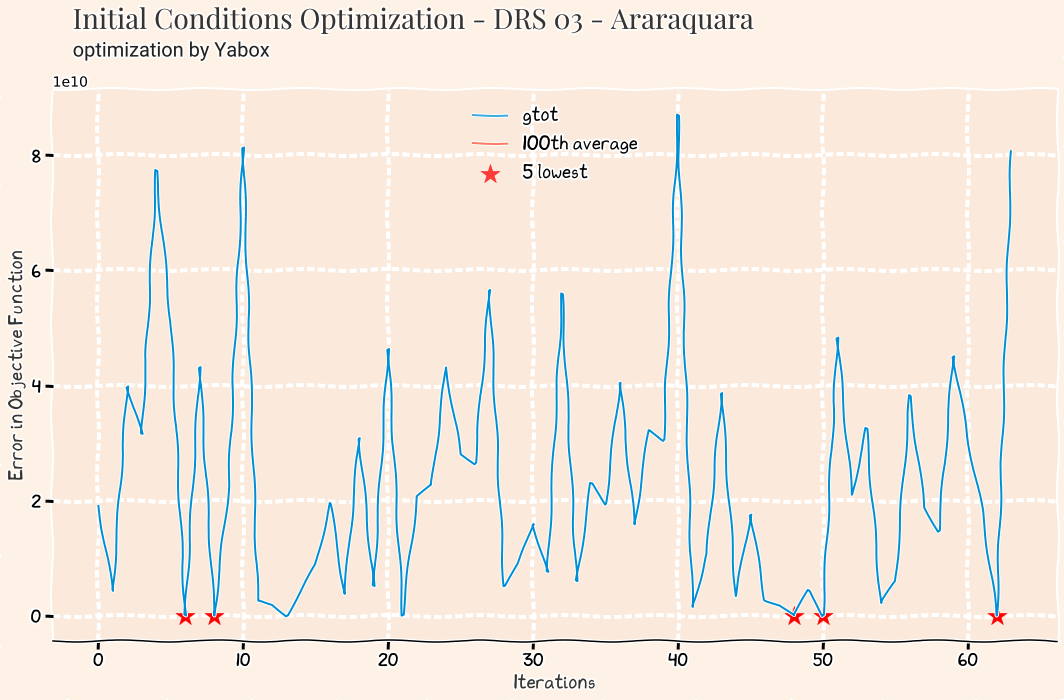

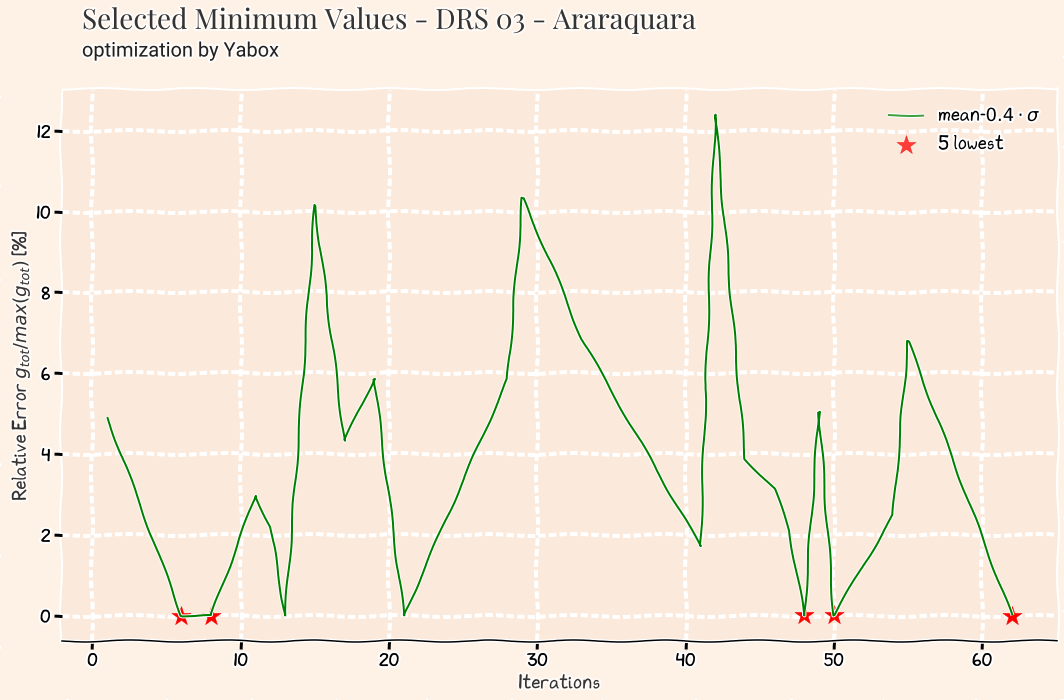

# Results for DRS 04 - Baixada Santista District Region

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
4 3.5622e+07 2020-04-01           32  179509  216  33 4.1780e-01 6.7000e-03

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
4  3.5622e+07 2020-04-01           32  179509  216  33 4.1780e-01 6.7000e-03
43 3.9936e+08 2020-03-30           74  317330   64  30 4.1840e-01 1.4900e-02
16 6.1967e+08 2020-04-01            3  489734  183  10 4.5080e-01 1.9000e-03
9  1.7520e+09 2020-04-02           56  399863  231   8 4.0480e-01 1.0400e-02
31 3.9978e+09 2020-03-31           44   93860  233   5 4.1620e-01 2.6700e-02

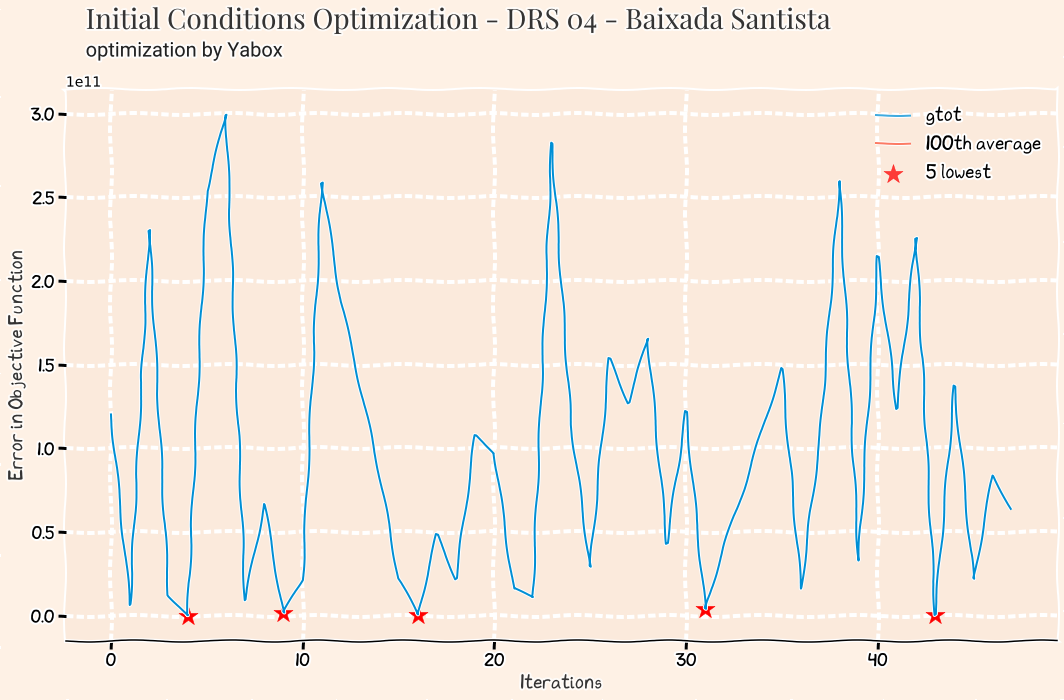

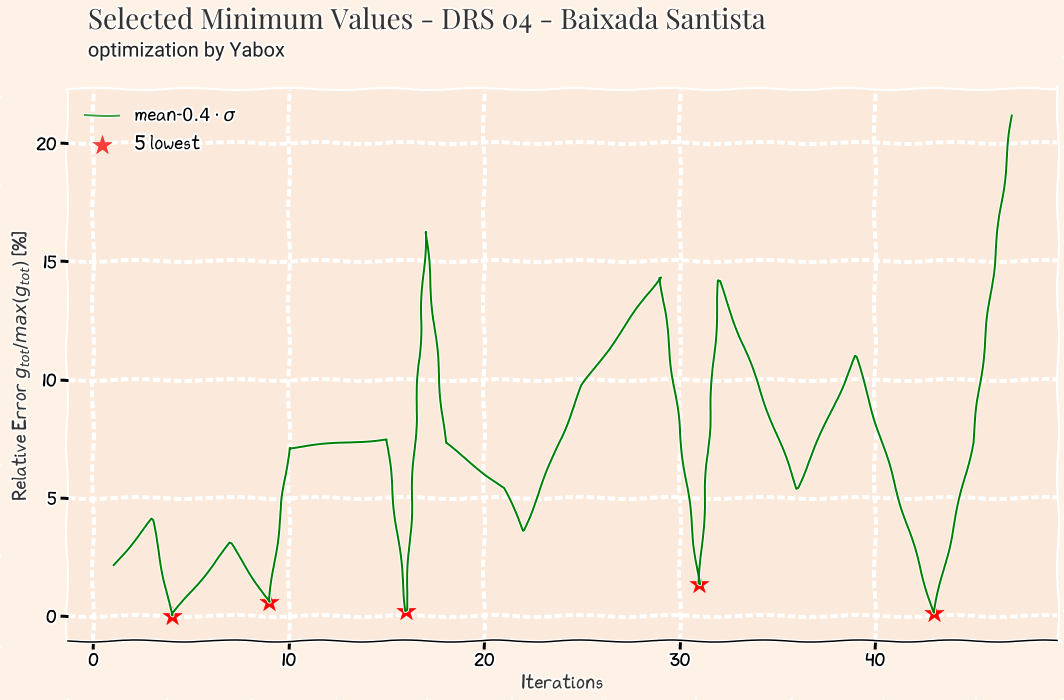

# Results for DRS 05 - Barretos District Region

gtot  startdate  startNcases     s0   i0  d0     wcases       wrec
22 9.0399e+04 2020-03-30           33  94721  183  16 5.7920e-01 1.2300e-02

## 5 Lowest Results

gtot  startdate  startNcases     s0   i0  d0     wcases       wrec
22 9.0399e+04 2020-03-30           33  94721  183  16 5.7920e-01 1.2300e-02
60 9.0826e+04 2020-03-31           93  79385  150  50 5.2260e-01 4.7600e-02
57 9.5633e+04 2020-03-30          131  31581  248  16 4.8590e-01 3.2000e-02
1  1.0435e+05 2020-04-02          117  74799  162  13 4.1260e-01 2.8800e-02
32 1.1964e+05 2020-04-02           89  46334  121  73 5.6400e-01 2.0000e-02

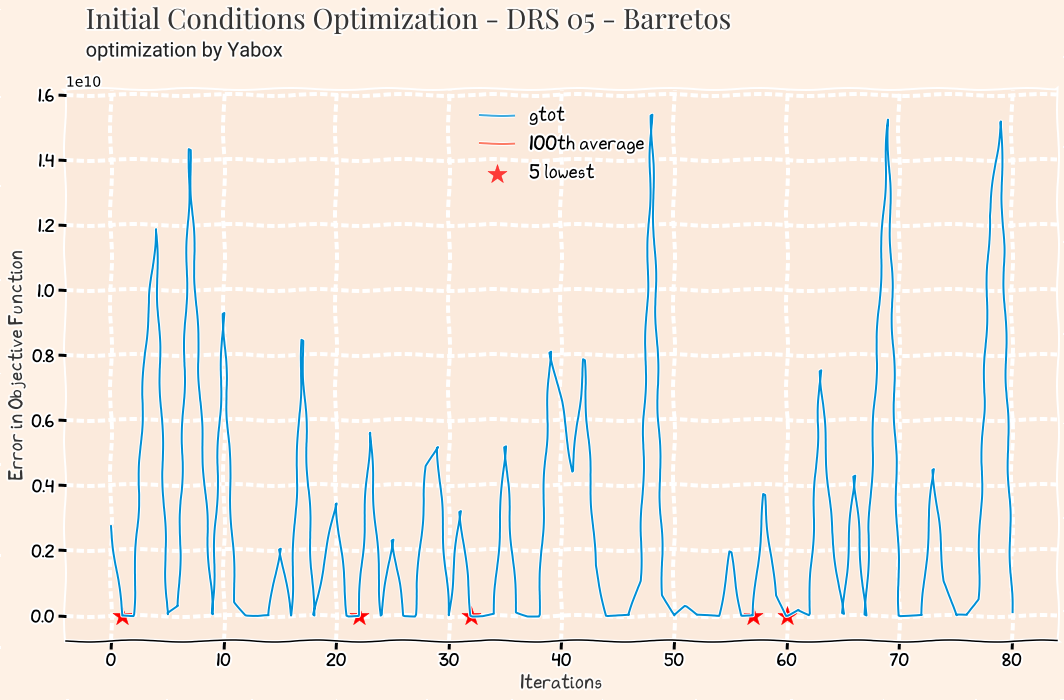

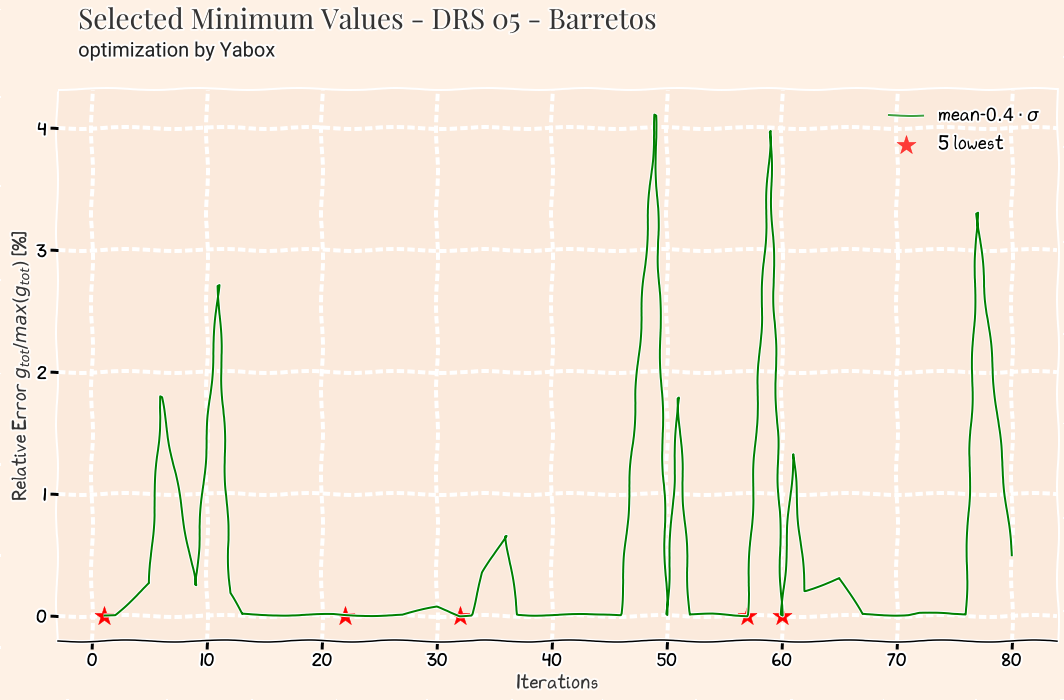

# Results for DRS 06 - Bauru District Region

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
49 9.9129e+06 2020-04-02           94  339168  236  10 4.0610e-01 2.3200e-02

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
49 9.9129e+06 2020-04-02           94  339168  236  10 4.0610e-01 2.3200e-02
38 1.2968e+07 2020-03-30            8  394693  197  35 5.9880e-01 2.8100e-02
31 1.4475e+07 2020-04-01          132  535318  193  19 5.5520e-01 2.5800e-02
15 7.4681e+07 2020-04-02           18  152637  124  82 5.1290e-01 5.5000e-03
48 1.1952e+09 2020-04-02          119  534507  120  87 5.7920e-01 8.7000e-03

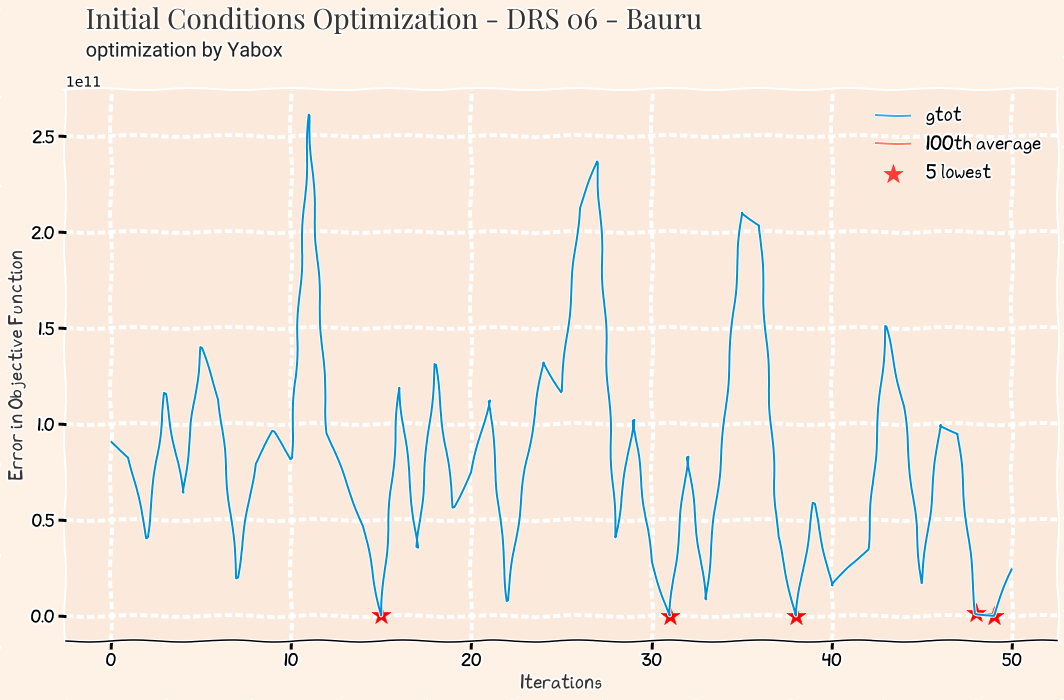

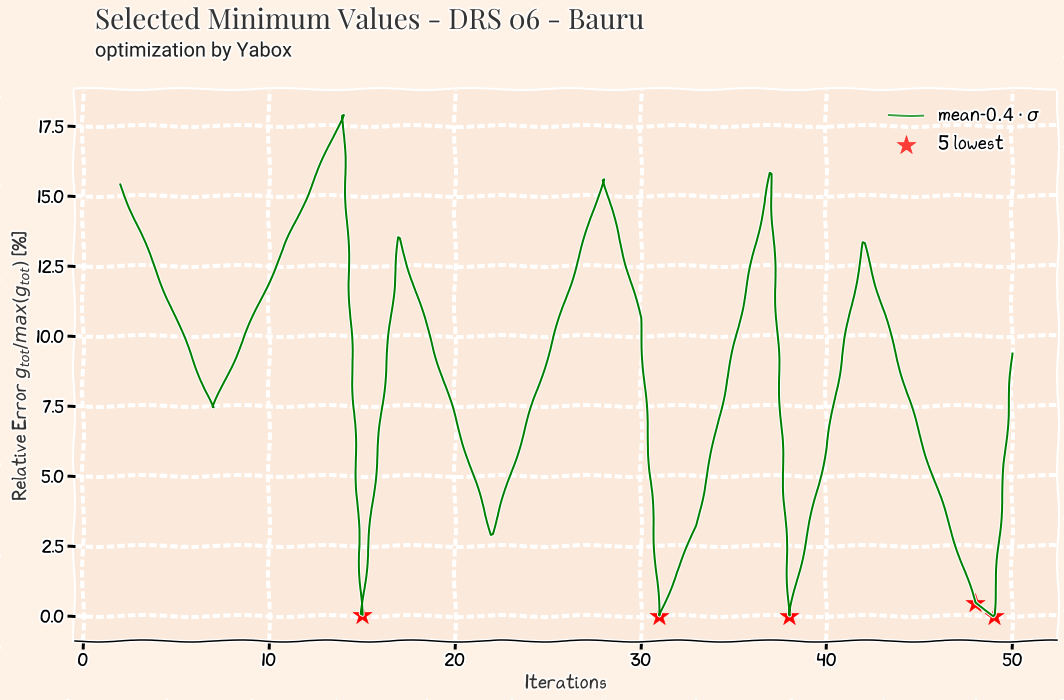

# Results for DRS 07 - Campinas District Region

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
34 1.1083e+08 2020-04-01           13  724027  226  96 4.2270e-01 9.9000e-03

## 5 Lowest Results

gtot  startdate  startNcases       s0   i0  d0     wcases       wrec
34 1.1083e+08 2020-04-01           13   724027  226  96 4.2270e-01 9.9000e-03
0  1.3174e+08 2020-04-02           86  1207247  108  19 4.5130e-01 7.8000e-03
33 3.0400e+09 2020-03-30           35   271638  145  90 5.8060e-01 1.9500e-02
25 1.9150e+10 2020-04-01           80   522761  152  50 4.1830e-01 1.8900e-02
10 3.0734e+10 2020-04-02          138   607018   80  42 4.5700e-01 2.1000e-03

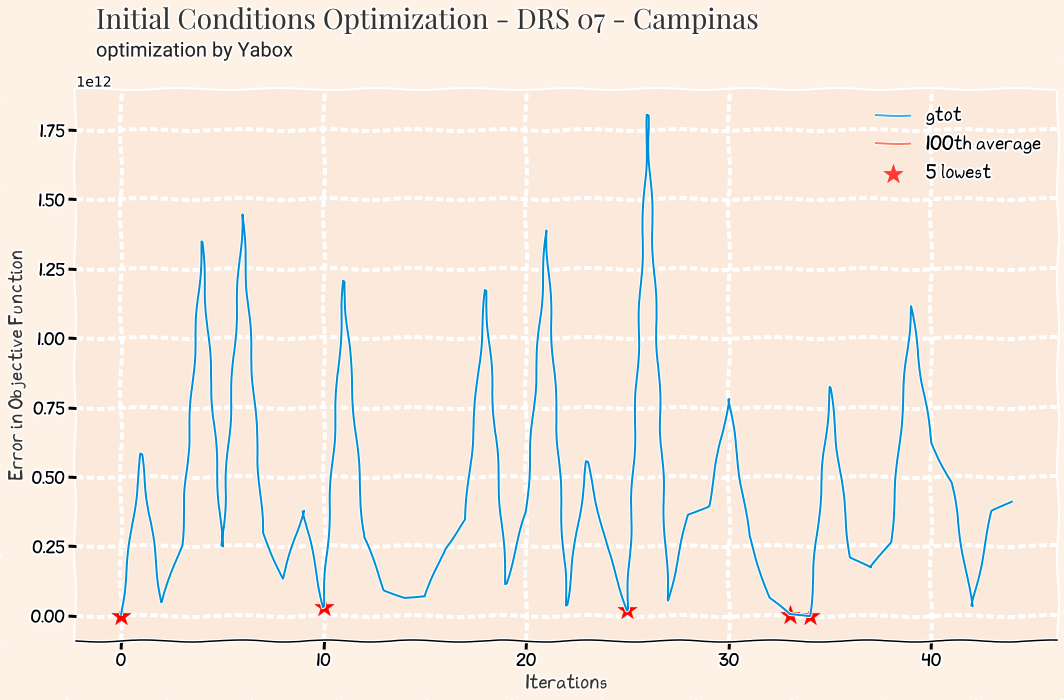

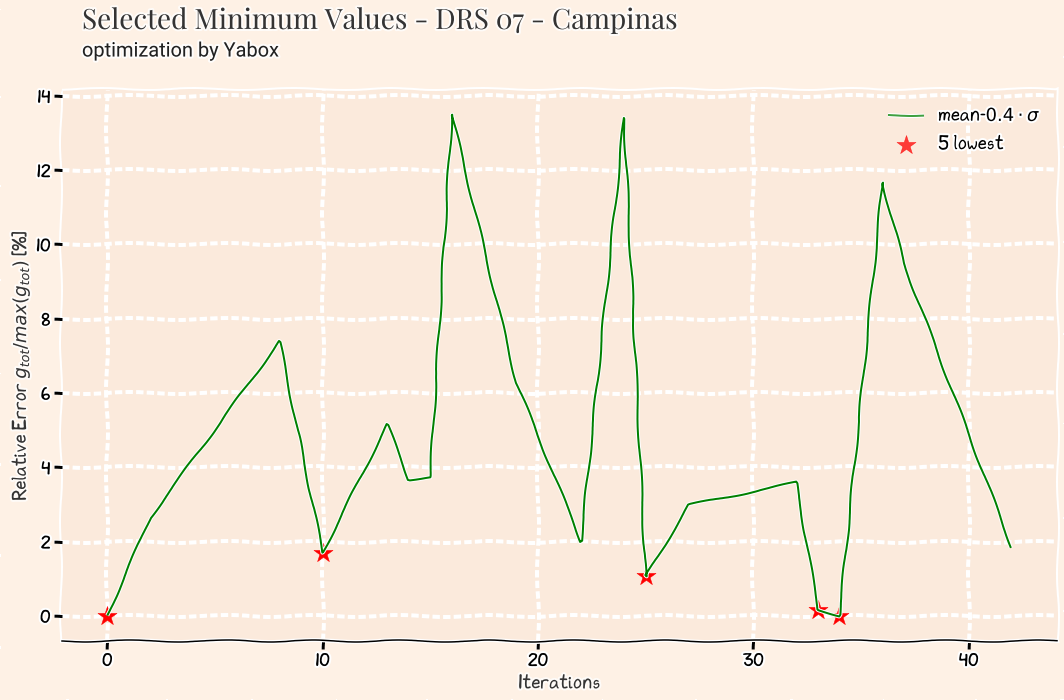

# Results for DRS 08 - Franca District Region

gtot  startdate  startNcases     s0  i0  d0     wcases       wrec
13 1.0020e+04 2020-03-31          140  60912  80  78 4.5640e-01 3.0100e-02

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
13 1.0020e+04 2020-03-31          140   60912   80  78 4.5640e-01 3.0100e-02
20 4.1334e+04 2020-04-02           93   81392  118   3 4.7330e-01 3.5300e-02
54 4.7348e+04 2020-04-01           87   78360  199  10 5.4200e-01 2.6200e-02
40 5.4031e+04 2020-03-30           55  113537  113  76 5.4760e-01 2.5900e-02
66 5.5328e+04 2020-03-30           92  114515  158  39 5.5520e-01 1.7800e-02

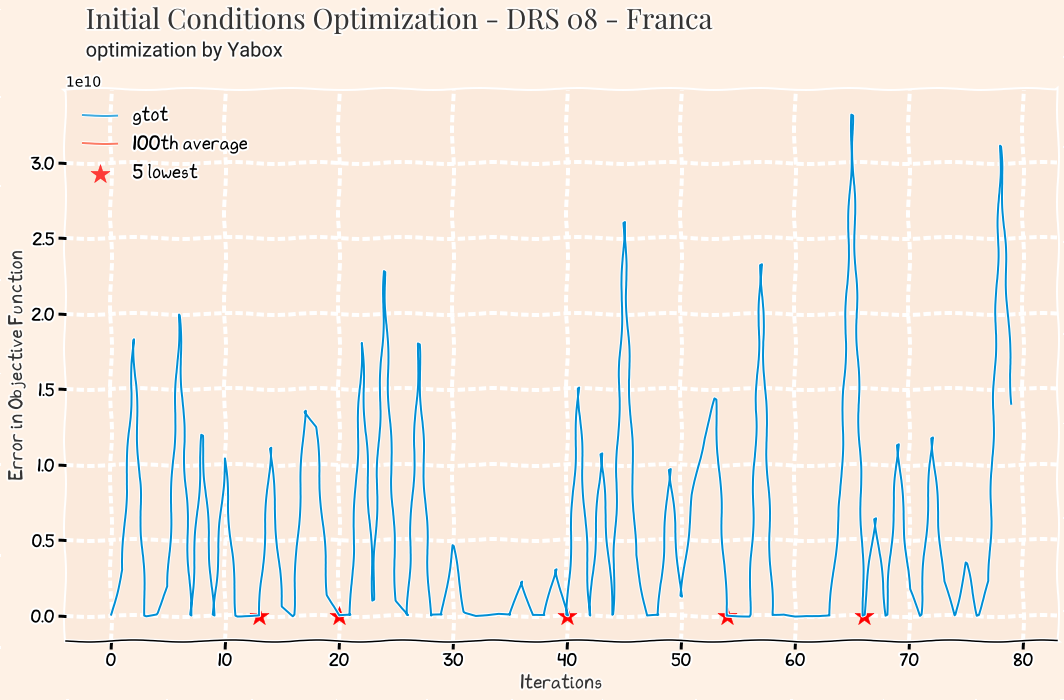

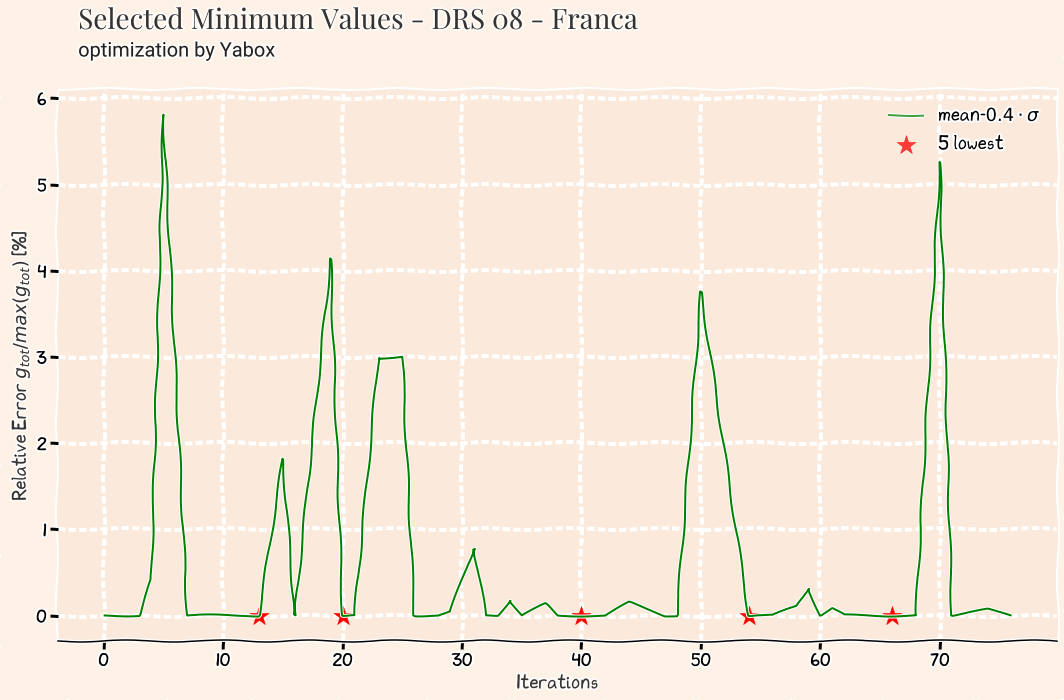

# Results for DRS 09 - Marília District Region

gtot  startdate  startNcases      s0  i0  d0     wcases       wrec
63 1.2372e+05 2020-04-01           88  259839  91  55 4.4700e-01 3.1900e-02

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
63 1.2372e+05 2020-04-01           88  259839   91  55 4.4700e-01 3.1900e-02
6  1.4273e+05 2020-03-30          107   96067   22  76 4.3230e-01 2.0700e-02
17 4.3422e+05 2020-03-31          133  117451  227  83 4.3740e-01 4.6300e-02
57 1.1494e+06 2020-04-01           38   86695  177  79 4.2870e-01 3.4100e-02
38 1.2142e+06 2020-04-01           77  200362  217  79 4.6540e-01 4.9700e-02

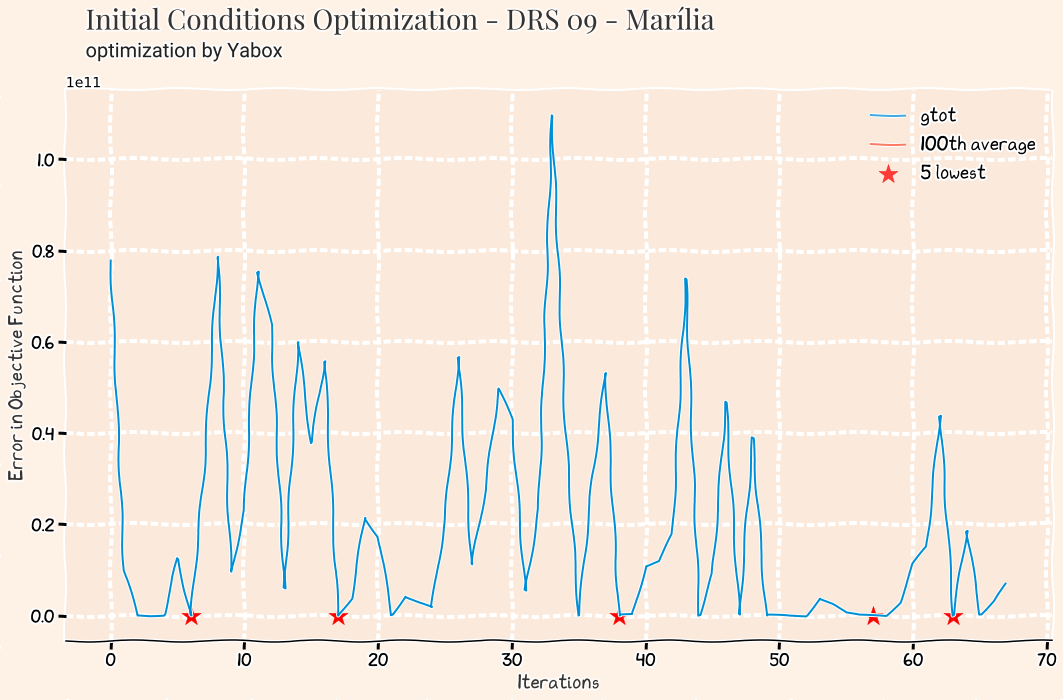

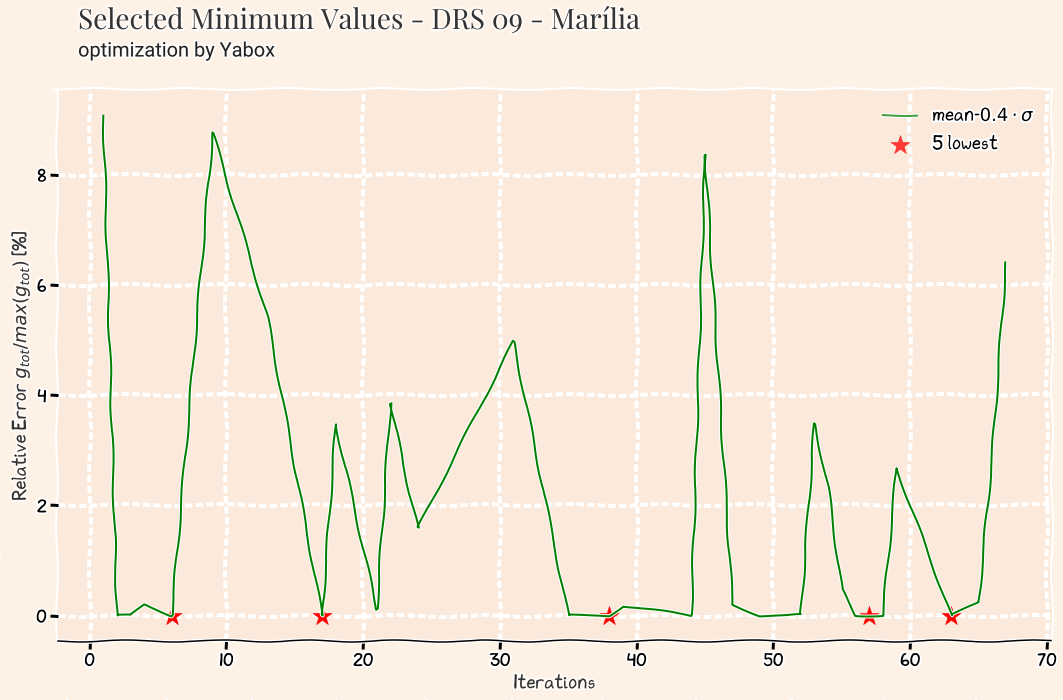

# Results for DRS 10 - Piracicaba District Region

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
0 1.4339e+06 2020-03-30          111  461407  104  33 4.3060e-01 9.5000e-03

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
0  1.4339e+06 2020-03-30          111  461407  104  33 4.3060e-01 9.5000e-03
13 1.1385e+07 2020-03-31          100   83414   79  71 5.1810e-01 2.6500e-02
5  1.7217e+07 2020-03-30            8  147412  193  53 5.7030e-01 3.6600e-02
22 1.7914e+07 2020-03-31           27   92906  193  77 4.9210e-01 1.5000e-02
39 1.9206e+07 2020-04-01          147  319814  123  85 5.2930e-01 5.0000e-03

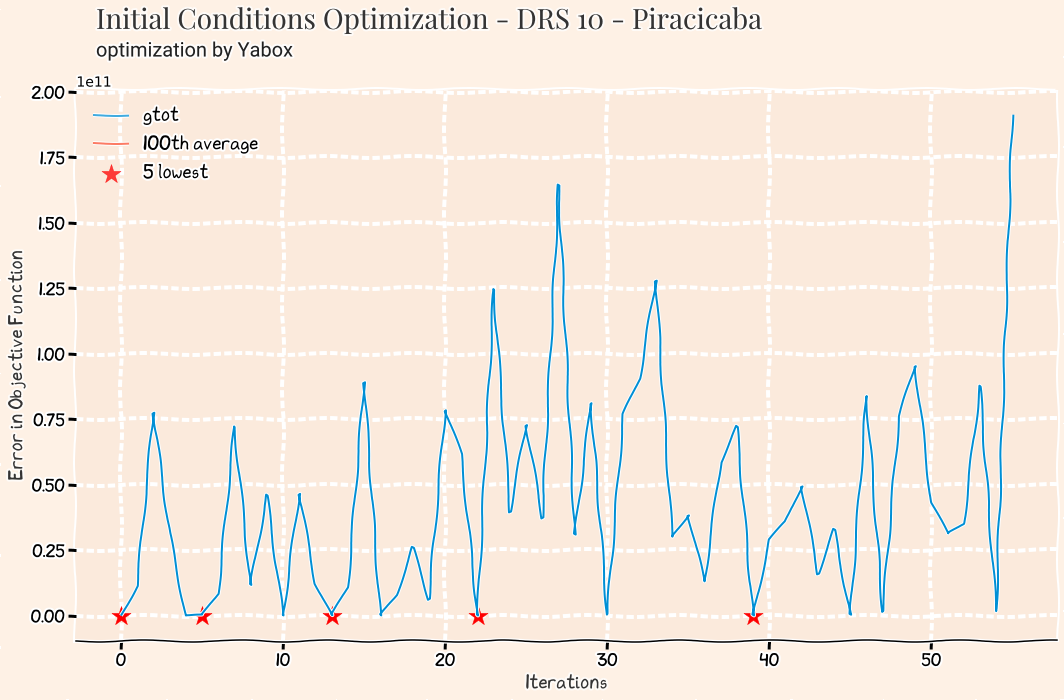

# Results for DRS 11 - Presidente Prudente District Region

gtot  startdate  startNcases      s0  i0  d0     wcases       wrec
60 7.1333e+04 2020-03-30          101  182723  72  53 4.1410e-01 2.7500e-02

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
60 7.1333e+04 2020-03-30          101  182723   72  53 4.1410e-01 2.7500e-02
47 7.5642e+04 2020-04-01           37   89983  201  58 4.5860e-01 2.9900e-02
56 8.0593e+04 2020-03-30           21  152763  246  25 4.2950e-01 2.6700e-02
65 8.3852e+04 2020-04-02          143  163546  108  98 4.1400e-01 4.2100e-02
40 1.2179e+05 2020-04-02          127   48468  228  11 5.4040e-01 4.6000e-02

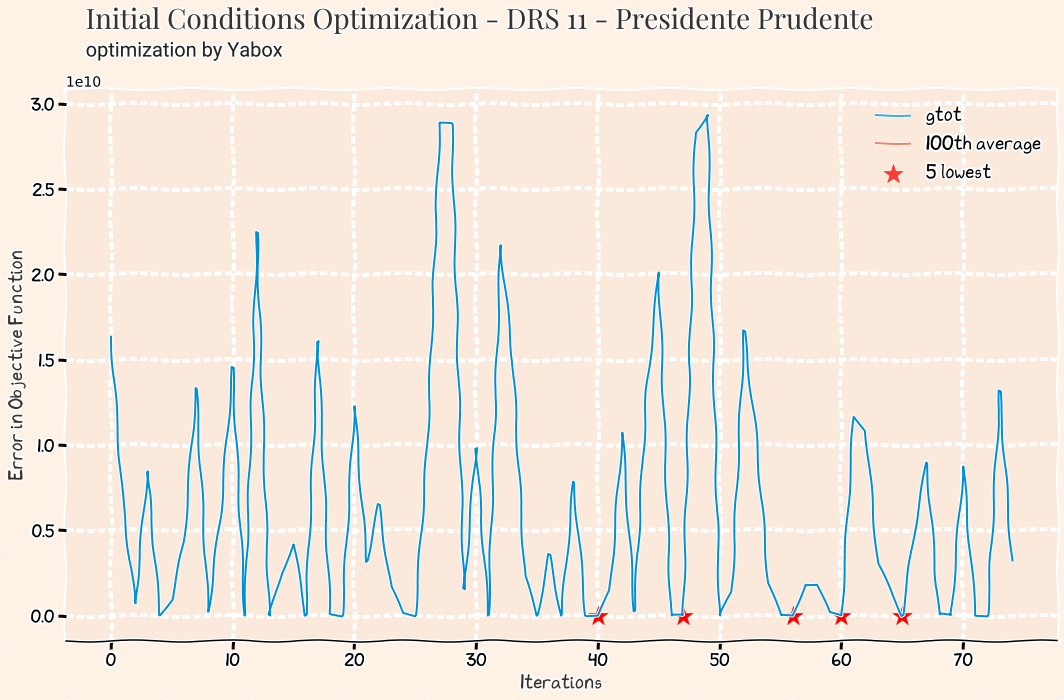

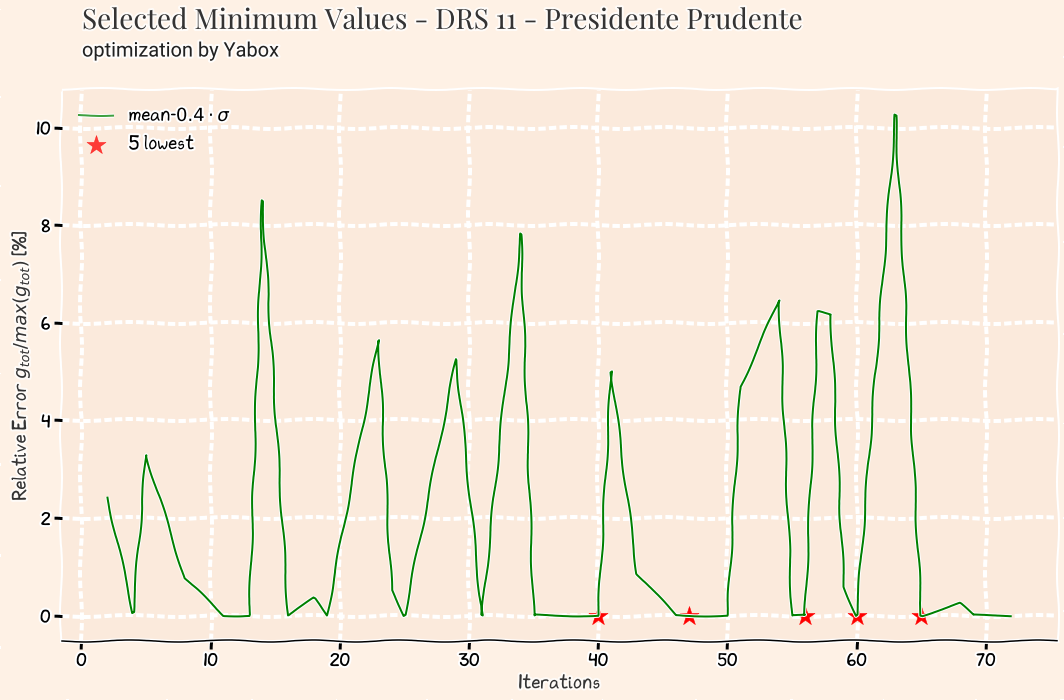

# Results for DRS 12 - Registro District Region

gtot  startdate  startNcases     s0   i0  d0     wcases       wrec
51 1.4553e+05 2020-03-30          109  23136  152  96 4.7740e-01 2.6200e-02

## 5 Lowest Results

gtot  startdate  startNcases     s0   i0  d0     wcases       wrec
51 1.4553e+05 2020-03-30          109  23136  152  96 4.7740e-01 2.6200e-02
25 1.5847e+05 2020-03-31          135  23569  192  89 5.3140e-01 1.2800e-02
50 3.6914e+05 2020-04-02           71  43762  132  49 4.4810e-01 2.5000e-02
40 4.7621e+05 2020-03-30           65  48961  153  34 4.0070e-01 3.1600e-02
36 5.2778e+05 2020-03-30           72  26649  178   7 4.0920e-01 2.9100e-02

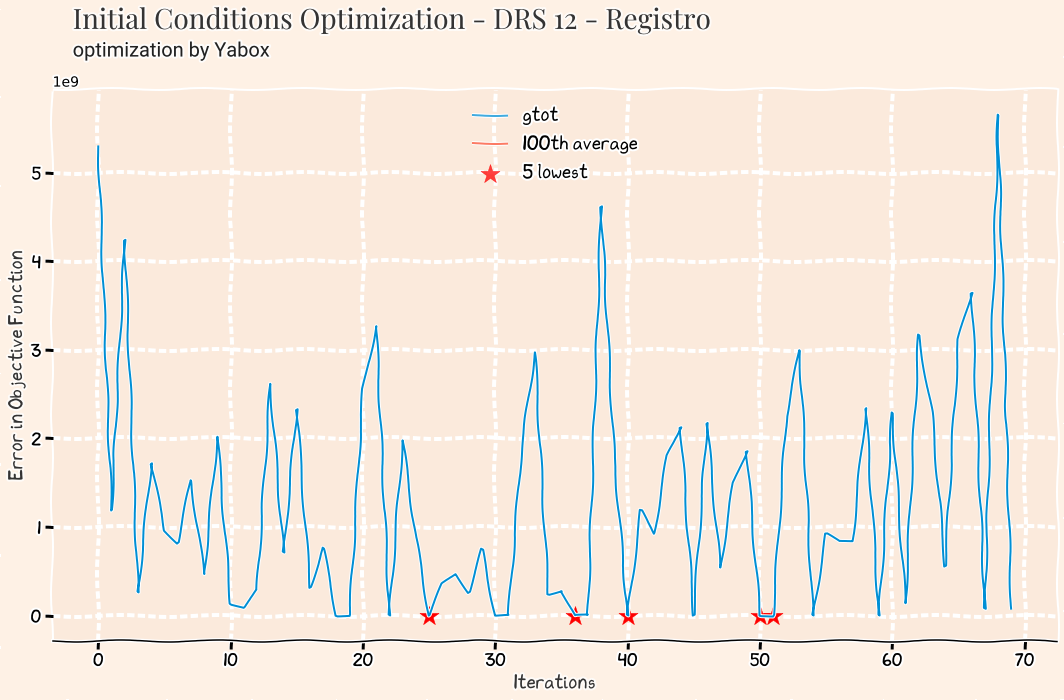

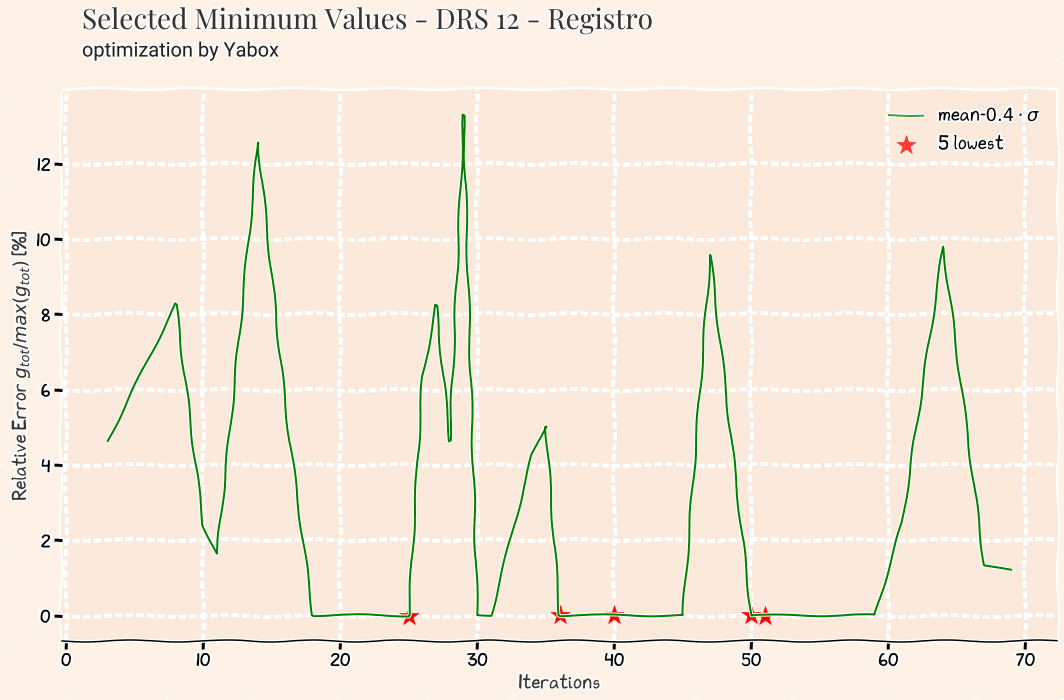

# Results for DRS 13 - Ribeirão Preto District Region

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
14 1.1317e+06 2020-04-01          120  359880  213  43 4.3120e-01 1.3000e-02

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
14 1.1317e+06 2020-04-01          120  359880  213  43 4.3120e-01 1.3000e-02
41 1.8467e+06 2020-04-02           80  218036  182  79 5.1600e-01 7.2000e-03
12 8.4461e+06 2020-04-01          146   88057  219  15 4.0470e-01 1.8300e-02
36 1.1225e+07 2020-04-01           77  208868   80  68 4.1170e-01 3.4000e-03
7  1.1891e+07 2020-04-02          103  151405  111  97 4.8360e-01 9.1000e-03

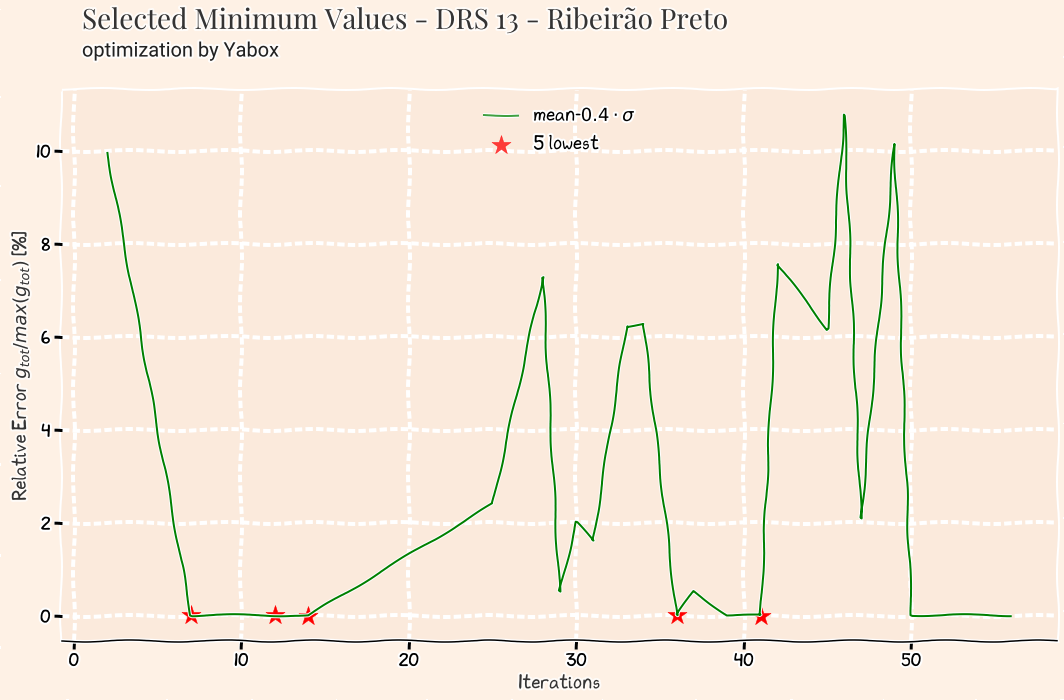

# Results for DRS 14 - São João da Boa Vista District Region

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
17 1.1270e+05 2020-03-31           66  220416  167  60 4.4990e-01 4.4000e-02

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
17 1.1270e+05 2020-03-31           66  220416  167  60 4.4990e-01 4.4000e-02
66 1.9590e+05 2020-03-31          123   54633  179  47 4.1780e-01 2.7900e-02
57 4.8065e+05 2020-03-30           94   59951  208  60 4.3970e-01 3.5500e-02
59 9.1497e+05 2020-04-01           90  154109  114  87 4.1510e-01 4.9100e-02
58 1.0489e+06 2020-04-01           83   42522  204  48 4.6170e-01 3.4700e-02

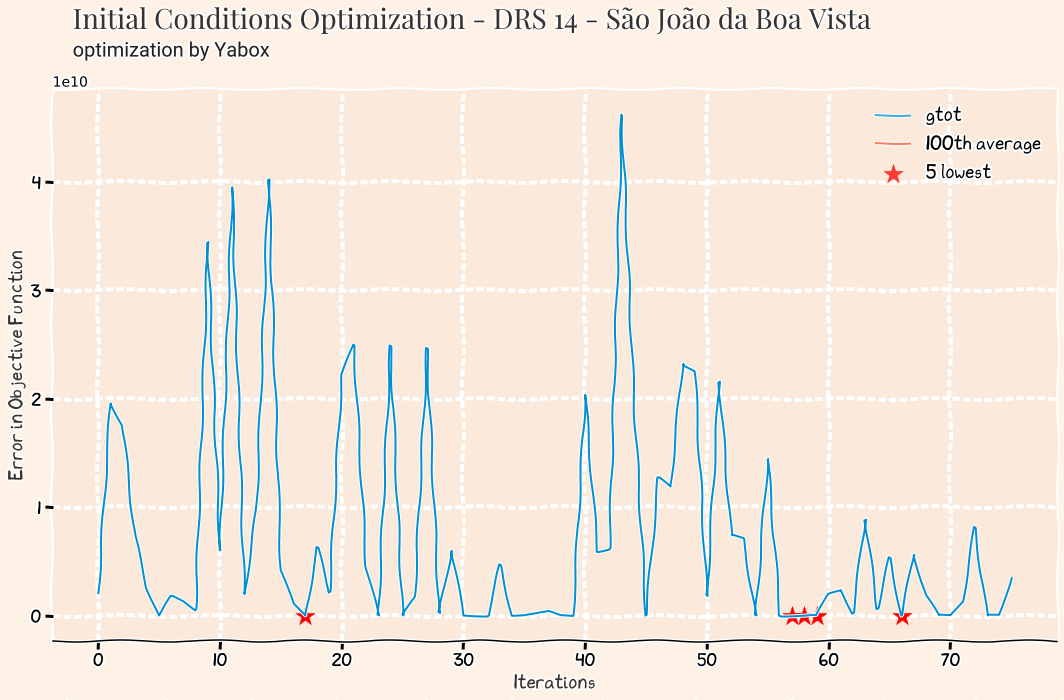

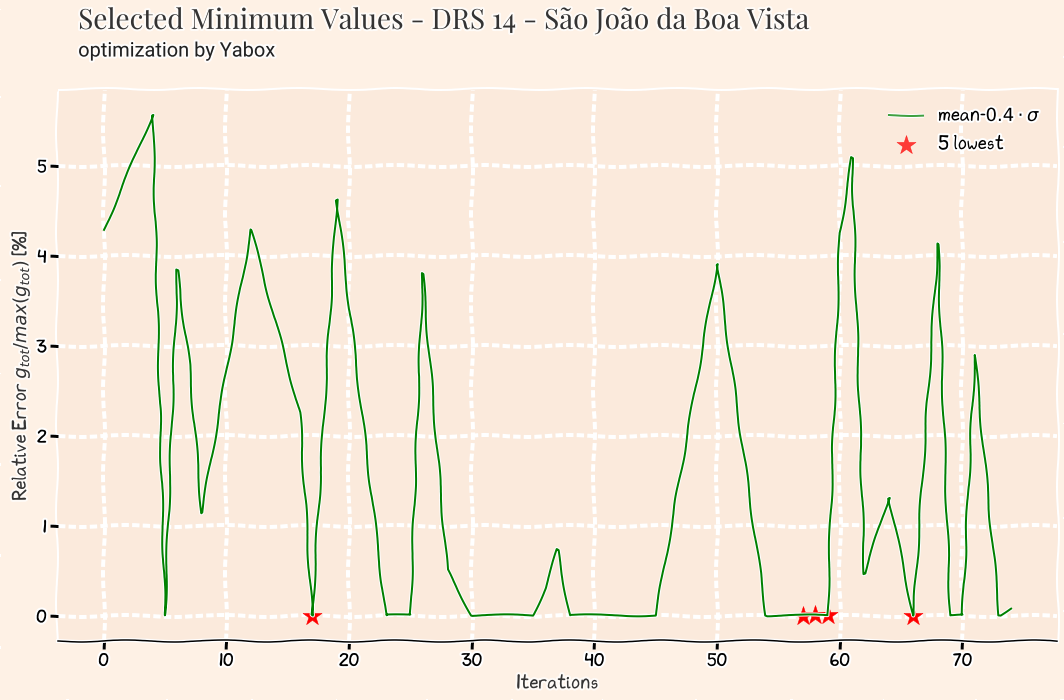

# Results for DRS 15 - São José do Rio Preto District Region

gtot  startdate  startNcases      s0  i0  d0     wcases       wrec
4 2.1982e+06 2020-03-30            3  353201   5  85 5.6670e-01 4.8000e-03

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
4  2.1982e+06 2020-03-30            3  353201    5  85 5.6670e-01 4.8000e-03
12 1.4047e+07 2020-03-31          122  157656  143  46 4.1390e-01 1.1400e-02
11 1.6182e+07 2020-04-02           20  122829  134  99 4.2840e-01 1.7800e-02
38 1.9750e+07 2020-03-30          115  126913  143  37 4.2330e-01 6.0000e-03
50 2.0991e+07 2020-03-31            5  439353  148  95 5.2930e-01 1.8700e-02

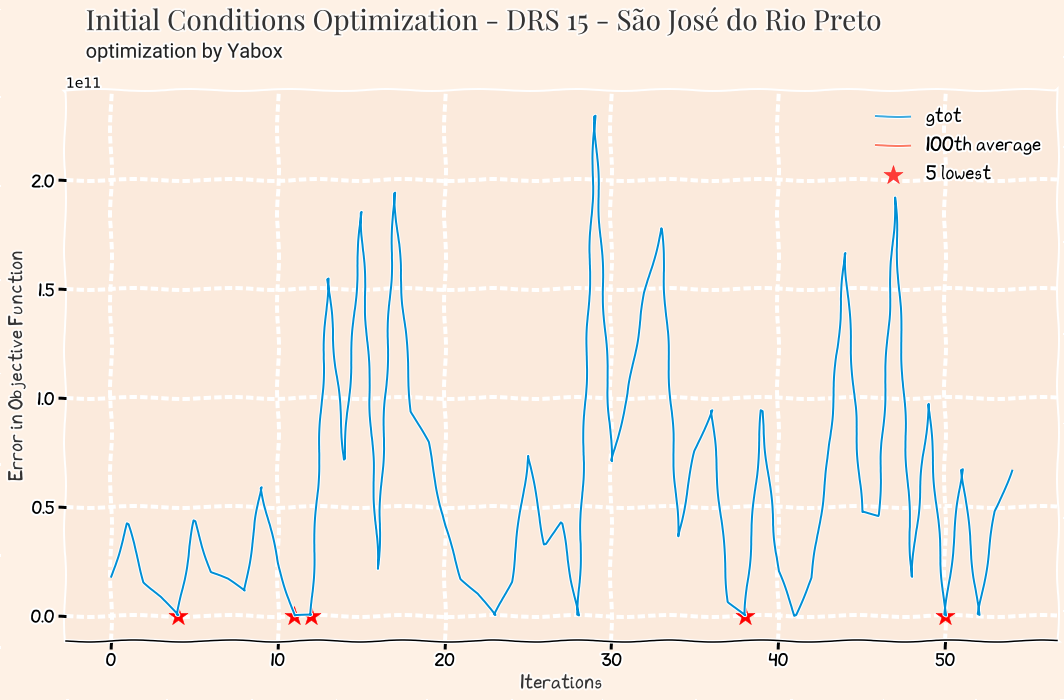

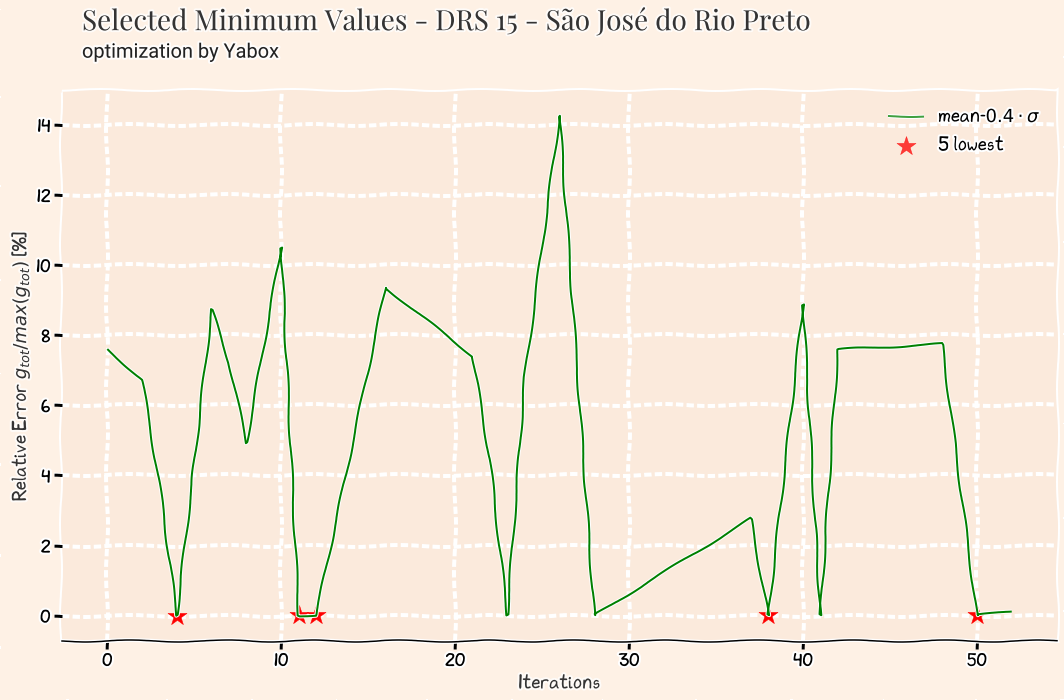

# Results for DRS 16 - Sorocaba District Region

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
8 1.8076e+06 2020-03-31          102  671121  133  63 4.0340e-01 1.3800e-02

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
8  1.8076e+06 2020-03-31          102  671121  133  63 4.0340e-01 1.3800e-02
33 1.2181e+07 2020-04-02           10  389379  173  63 4.9470e-01 8.4000e-03
41 2.5208e+07 2020-03-31           83  419241  158  89 4.8100e-01 1.2700e-02
17 2.8209e+07 2020-03-31          119  574351  145  98 5.1930e-01 1.4900e-02
46 1.1132e+09 2020-04-02           14  620909  174  75 5.8560e-01 6.9000e-03

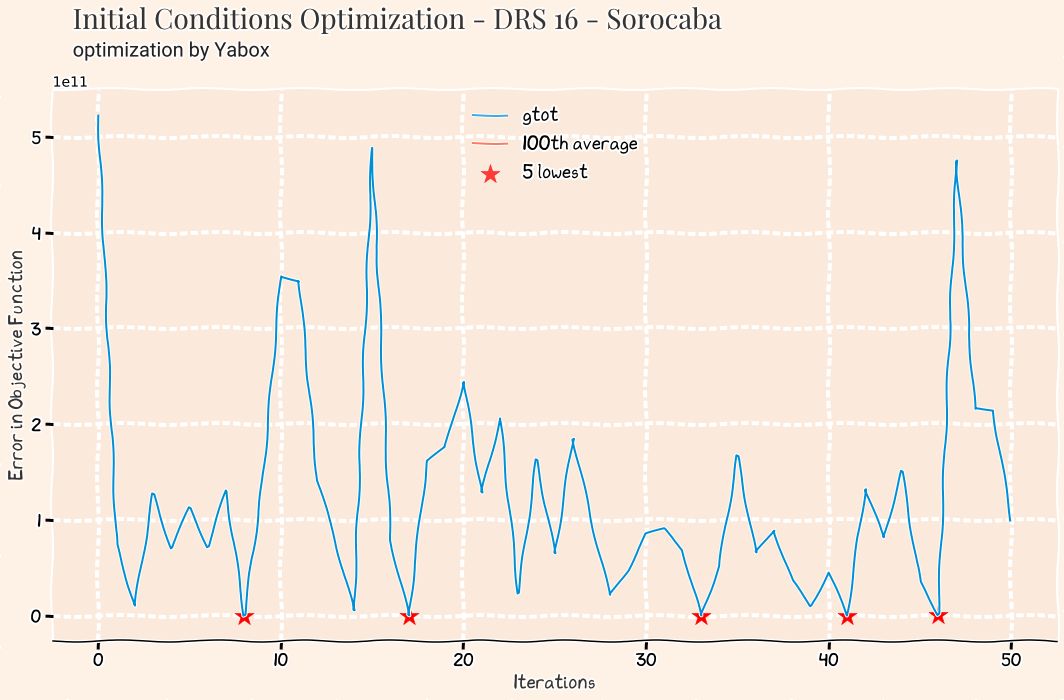

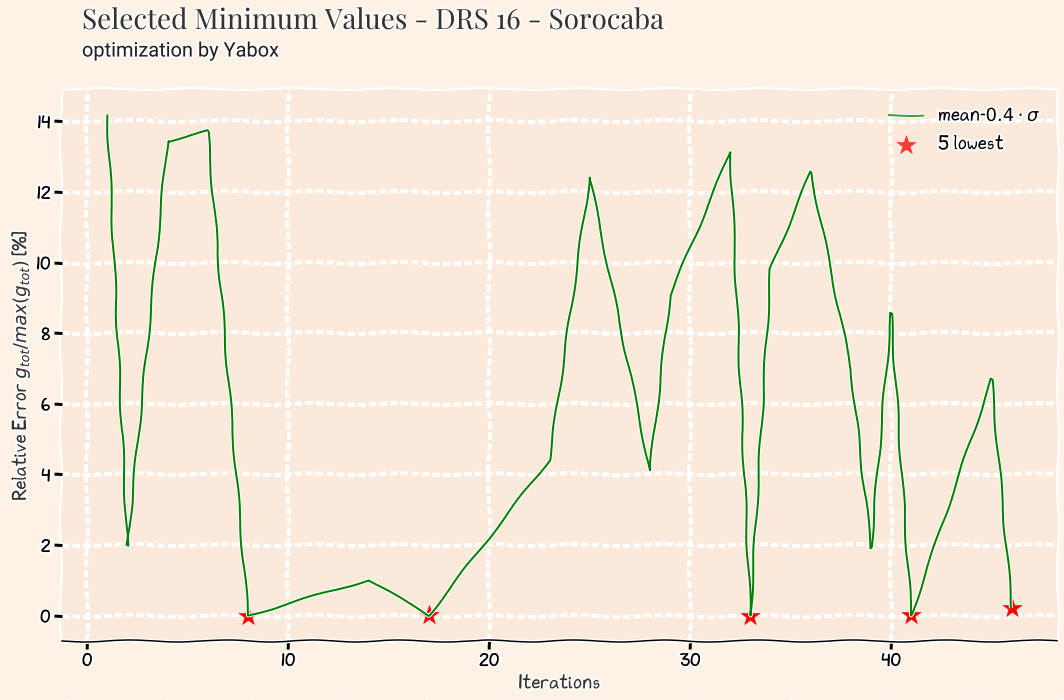

# Results for DRS 17 - Taubaté District Region

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
5 1.2403e+06 2020-03-30          149  604208  144  94 5.3170e-01 4.3300e-02

## 5 Lowest Results

gtot  startdate  startNcases      s0   i0  d0     wcases       wrec
5  1.2403e+06 2020-03-30          149  604208  144  94 5.3170e-01 4.3300e-02
6  1.7747e+06 2020-03-30            6  158023  174  89 4.6120e-01 1.6100e-02
16 2.2274e+06 2020-04-02           29  611070   63  43 5.5040e-01 1.4200e-02
19 1.2919e+07 2020-03-30          138  214609   95  59 5.1710e-01 1.2200e-02
26 1.4793e+07 2020-04-01          108  391021   29  20 4.8850e-01 9.9000e-03

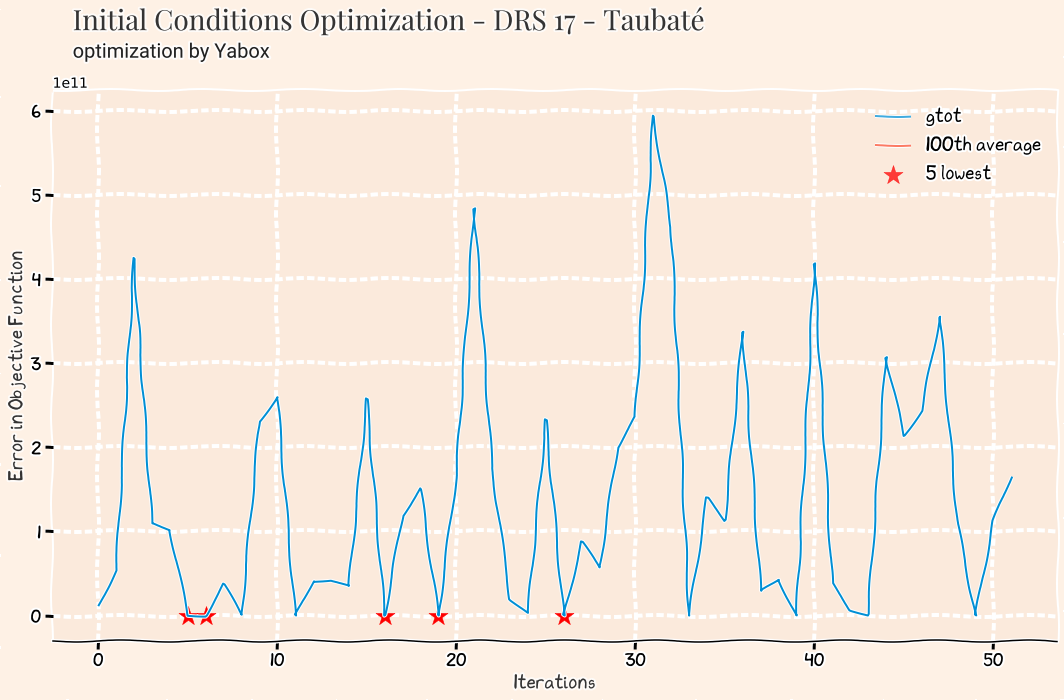

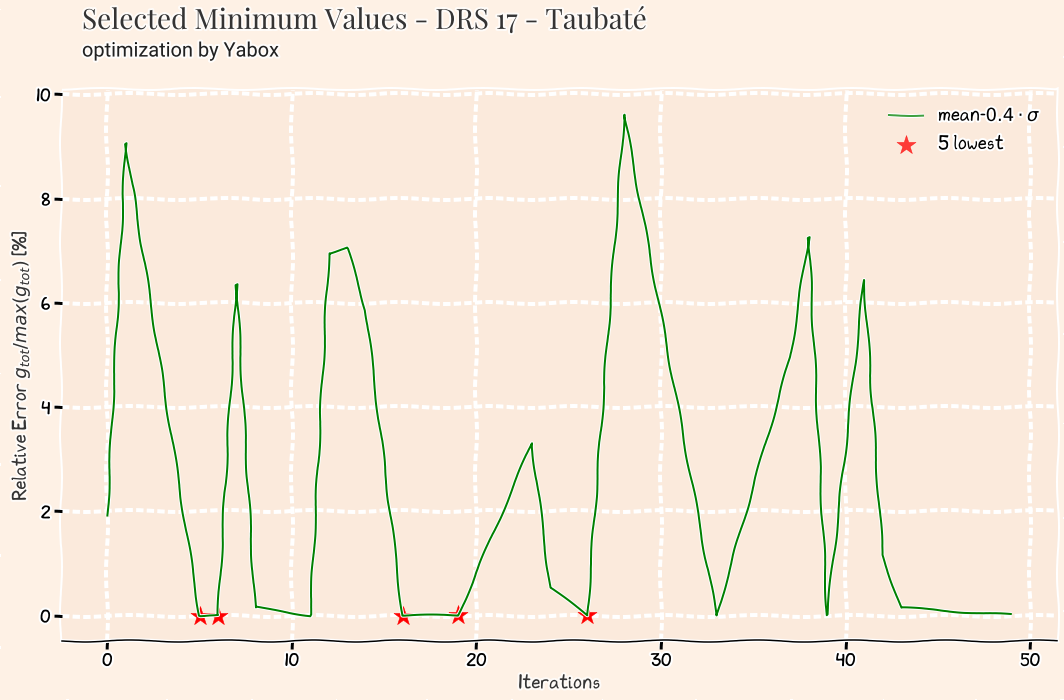

In [78]:
ggtot=[]
for districtRegion in DRS:
    versionStr=str(version)
    dateparse = lambda x: datetime.strptime(x, ' %Y-%m-%d')
    histOptAll= pd.read_table('./results/history_'+districtRegion+versionStr+'.csv', sep=",", \
                                index_col=0, header=None, parse_dates=[3], date_parser=dateparse,
        names = ["districtRegion","gtot",\
            "s0","startdate","i0","d0","startNcases","wcases","wrec"])
    histOptAll = histOptAll[['gtot', 'startdate','startNcases','s0',"i0","d0","wcases","wrec"]]
        
    #clean data
    histOptAll=histOptAll.dropna(how='all')
    histOptAll.gtot=pd.to_numeric(histOptAll.gtot, errors='coerce')
    histOptAll = histOptAll.reset_index(drop=True)
    histOptAll = histOptAll[histOptAll.loc[:,"gtot"]<0.5e14]
    
    #format integers and decimal places
#     histOptAll['gtot'] = histOptAll['gtot'].apply(lambda x: int(x+0.5))
    histOptAll['d0'] = histOptAll['d0'].apply(lambda x: int(x+0.5))
    histOptAll['startNcases'] = histOptAll['startNcases'].apply(lambda x: int(x+0.5))
    histOptAll['s0'] = histOptAll['s0'].apply(lambda x: int(x+0.5))
    histOptAll['i0'] = histOptAll['i0'].apply(lambda x: int(x+0.5))
    histOptAll['wcases'] = histOptAll['wcases'].apply(lambda x: round(x,4))
    histOptAll['wrec'] = histOptAll['wrec'].apply(lambda x: round(x,4))
    
    #print optimum parameters
    histOpt=histOptAll[histOptAll.gtot==min(histOptAll.gtot)]
    histOpt=histOpt.head(1)
    display(Markdown("# Results for "+districtRegion+" District Region"))
    display(histOpt.iloc[:,0:8])
    histOpt.to_csv("data/vars_optimized_"+districtRegion+model+"HistMin.csv", sep=",", index=False)
        
    #current parameters
    query = dfparam.query('DRS == "{}"'.format(districtRegion)).reset_index()
    parameters = np.array(query.iloc[:, 2:])[0]
    if len(parameters)>12:
        date,predict_range,s0,e0,a0,i0,r0,d0,startNCases,ratio,wcases,wrec,popEst = parameters
    else:
        date,predict_range,s0,e0,a0,i0,r0,d0,startNCases,ratio,wcases,wrec = parameters
    
    #query parameters
    j = query['index'].values[0]
    
    #define s0, i0 and d0
    dfparam.at[j, "s0"] = histOpt.s0
    dfparam['s0'] = dfparam['s0'].astype(int)
    dfparam.at[j, "i0"] = histOpt.i0
    dfparam['i0'] = dfparam['i0'].astype(int)
    dfparam.at[j, "d0"] = histOpt.d0
    dfparam.at[j, "START"] = histOpt.startNcases
    
    dfparam['a0'] = dfparam['a0'].astype(int)
    dfparam['e0'] = dfparam['e0'].astype(int)
    dfparam['r0'] = dfparam['r0'].astype(int)
    dfparam['d0'] = dfparam['d0'].astype(int)
    #define Start N Cases
    dfparam['START'] = dfparam['START'].astype(int)
    #define date, wcases, wrec
    dfparam.at[j, "start-date"] = histOpt.startdate.dt.strftime('%Y-%m-%d').values[0]
    dfparam.at[j, "WCASES"] = histOpt.wcases
    dfparam.at[j, "WREC"] = histOpt.wrec
    
    dfparam.r0=0
    
    #save new parameters
    dfparam.to_csv("data/param_optimized_"+model+"_HistMin.csv", sep=",", index=False)
    
    ggtot.append(histOpt.gtot.values[0])
    
    #prepare plotting
    color_bg = '#FEF1E5'
    # lighter_highlight = '#FAE6E1'
    darker_highlight = '#FBEADC'
    plt.rc('font', size=14)
    
    with plt.xkcd():
        fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
        ax.patch.set_facecolor(darker_highlight)
        
        #fonts for the thicks
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(comic_font)
            label.set_fontsize(16) # Size here overrides font_prop
        
        #labels for x and y axis
        plt.xlabel("Iterations", fontproperties=comic_font, alpha = .75)
        plt.ylabel("Error in Objective Function", fontproperties=comic_font, alpha = .75)
        
        # Hide the left, right and top spines
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        #PLOTTING itself
        x=histOptAll.index
        y=histOptAll.gtot
        ax.plot(x,y, label="gtot")
        display(Markdown("## 5 Lowest Results"))
        histMin=histOptAll.nsmallest(5, ['gtot']).sort_values('gtot').iloc[:,0:8]
        display(histMin)

        ax.scatter(histMin.index, histMin.gtot,label="5 lowest",c='red',marker='*',s=400)
        histOptAll.rolling(100).mean()['gtot'].plot(label="100th average")

        # Adding a title and a subtitle
        plt.text(x = 0.02, y = 1.11, s = "Initial Conditions Optimization - "+districtRegion,
                    fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
                    fontproperties=heading_font)
        plt.text(x = 0.02, y = 1.06,
                    s = "optimization by "+model,
                    fontsize = 26, alpha = .85,transform=ax.transAxes, 
                    fontproperties=subtitle_font)
        
        leg=ax.legend(frameon=False,prop=comic_font,fontsize=16)
        for lh in leg.legendHandles: 
            lh.set_alpha(0.75)
        ax.grid(True, linestyle='--', linewidth='2', color='white',alpha=0.1)

        fig.tight_layout()
        strFile ='./results/convergence_'+districtRegion+versionStr+'.png'
        fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
        plt.show()
        
        fig, ax = plt.subplots(figsize=(15, 10),facecolor=color_bg)
        ax.patch.set_facecolor(darker_highlight)
        
        # Hide the left, right and top spines
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        #fonts for the thicks
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontproperties(comic_font)
            label.set_fontsize(16) # Size here overrides font_prop
        
        histMin=histOptAll.iloc[:,0:8]
        histMin.sort_index(inplace=True)
        
        histMin['error']=histMin.gtot/histMin.gtot.max()*100
        x=histMin.index[histMin.error<histMin.error.mean()-0.4*histMin.error.std()]
        y=histMin.error[histMin.error<histMin.error.mean()-0.4*histMin.error.std()]
                
        ax.plot(x, y, label="mean-$0.4 \cdot \sigma$",c='green')
        histMin2=histMin.nsmallest(5, ['gtot']).sort_values('gtot')
        ax.scatter(histMin2.index, histMin2.gtot/histMin.gtot.max()*100,label="5 lowest",c='red',marker='*',s=400)
        
        #labels for x and y axis
        plt.xlabel("Iterations", fontproperties=comic_font, alpha = .75)
        plt.ylabel("Relative Error $g_{tot}/max(g_{tot})$ [%]", fontproperties=comic_font, alpha = .75)

        # Adding a title and a subtitle
        plt.text(x = 0.02, y = 1.11, s = "Selected Minimum Values - "+districtRegion,
                    fontsize = 34, weight = 'bold', alpha = .75,transform=ax.transAxes, 
                    fontproperties=heading_font)
        plt.text(x = 0.02, y = 1.06,
                    s = "optimization by "+model,
                    fontsize = 26, alpha = .85,transform=ax.transAxes, 
                    fontproperties=subtitle_font)
        
        leg=ax.legend(frameon=False,prop=comic_font,fontsize=16)
        for lh in leg.legendHandles: 
            lh.set_alpha(0.75)
        ax.grid(True, linestyle='--', linewidth='2', color='white',alpha=0.1)

        fig.tight_layout()
        strFile ='./results/minimumPoints_'+districtRegion+versionStr+'.png'
        fig.savefig(strFile, facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())
        plt.show()

In [70]:
display(Markdown("# Final Results for Initial Conditions"))
display(Markdown("## "+model+" optimization model"))

from IPython.display import HTML

dfparam["gtot"] = pd.Series(ggtot)
gtot_min=dfparam.gtot.min()
gtot_max=dfparam.gtot.max()
gtot_range=gtot_max-gtot_min
gtot_mean=dfparam.gtot.mean()
gtot_std=dfparam.gtot.std()

dfparam['gtot'] = dfparam['gtot'].astype(int)
dfparam['RATIO'] = dfparam['RATIO'].round(decimals=2)

gtot_high=(gtot_mean)/gtot_range
gtot_low=abs(gtot_mean-gtot_std)/gtot_range

s = dfparam.style.background_gradient(cmap='RdYlGn_r',
            axis=0,subset=['s0','i0','d0','gtot'],low=gtot_low/2.74,high=gtot_high/100)
display(s)

# Final Results for Initial Conditions

## Yabox optimization model